In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

import datetime as dt
import mplfinance as mpf
import time
import yfinance as yf

import os
from os import listdir
from os.path import isfile, join

In [2]:
import statsmodels.api as sm
import seaborn as sns

In [3]:
#default Values
path ="/workspaces/Quantitative-Finance/Data/"
S_year = 2018
S_month = 1
S_day = 1
S_date_str = f"{S_year}-{S_month}-{S_day}"
S_date_datetime = dt.datetime(S_year,S_month,S_day)

E_year = 2020
E_month = 12
E_day = 31
E_date_str = f"{E_year}-{E_month}-{E_day}"
E_date_datetime = dt.datetime(E_year,E_month,E_day)


In [4]:
# return dataframe from csv
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv(path+ticker+".csv",index_col='Date',parse_dates=True)
    except FileNotFoundError:
        print("File doesn't exist")
    else:
        return df

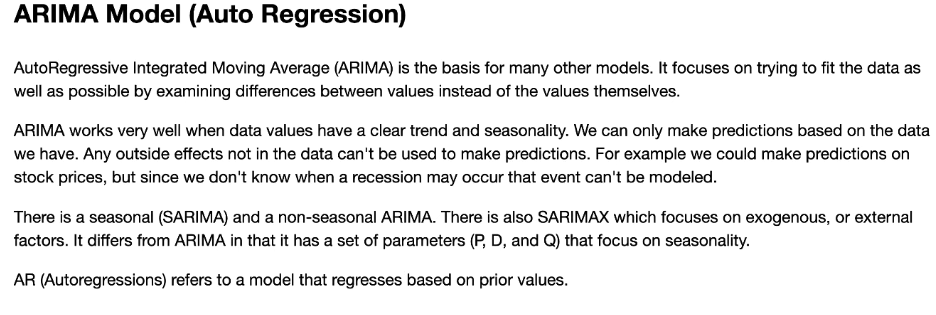

In [10]:
# Regression Analysis
# Arima Model
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
a_df = get_df_from_csv("GOOG")
a_df = a_df.asfreq('d') 
a_df = a_df.fillna(method='ffill')
a_df.drop(a_df.columns[a_df.columns.str.contains('unnamed', case=False)],
          axis=1, inplace=True)
a_df = a_df.drop(['daily_return'], axis=1)


sns.set_style('darkgrid')

/tmp/ipykernel_2074/1605789732.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  a_df = a_df.fillna(method='ffill')


,Adj Close
Date,
2017-01-03,786.140015
2017-01-04,786.900024
2017-01-05,794.020020
2017-01-06,806.150024
2017-01-07,806.150024
...,...
2021-08-15,2768.120117
2021-08-16,2778.320068
2021-08-17,2746.010010
